# Twitter US Airline Sentiment Analysis
#### Using MongoDB, Spark NLP and pre-trained models


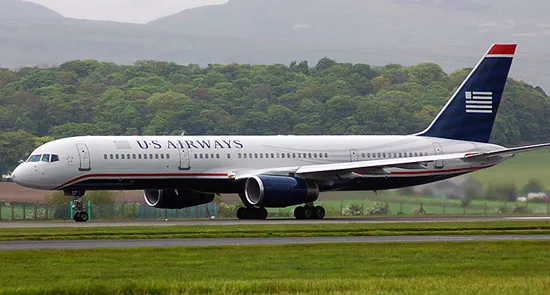

## Summary:
On Twitter, huge amounts of data is generated daily. By using this data to get meaningful information, we can help businesses around the world no matter what the type of business we are working with. Finding if most of the customers are satisfied with our services can be applied to any business and can help decide future decisions to be taken. In our case we are going to analyze tweets using sentiment analysis to find if customers are sarisfied with US Airlines

## Tools and resources used:
1. Spark, a tool for working with big data
2. Spark NLP, a library for natural language processing
3. Matplotlib library for visualizing the results
4. MongoDB databse
5. Dataset with twitter reviews from https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download


In [ ]:
# installing pymongo which will be used to extract data from our database
!pip install pymongo

In [42]:
# importing necessary packages to connect to MongoDB
import pymongo
from pymongo import MongoClient

# connecting to the database
# note that to connect to your database you will need a username and a password
uri = 'mongodb+srv://husseinshiri13:<password>@cluster0.by4psgn.mongodb.net/DatacampPortfolio'
client = MongoClient( uri )

In [44]:
# choosing our database to connect to
# in this case it is DatacampPortfolio database
db = client.DatacampPortfolio

# get the collection names in the database
# in our case we have only 1 collection named TweetsAndReviews
# this collection contains the tweets reviewing the airline service
# collections are somehow like tables in relational databases
db.list_collection_names()

['TweetsAndReviews']

In [46]:
# counting the number of tweets in our database
filter = {}
print('Number of tweets: ', db.TweetsAndReviews.count_documents(filter))
print('\n')

# extracting one tweet to get a feel of how the sentence is structured
print(db.TweetsAndReviews.find_one(filter)['text'])

Number of tweets:  14640


@VirginAmerica and it's a really big bad thing about it


In [47]:
# generating a list with all the objects in the collection
# each object contains several fields like tweet_id and others in addition to the tweet
list_of_objects = list(db.TweetsAndReviews.find({}))
print('Number of objects in the list: ', len(list_of_objects))

Number of objects in the list:  14640


In [48]:
list_of_sentences = []

# generating a list of the sentences(tweets) from the list of objects
for l in list_of_objects:
  list_of_sentences.append(str(l['text']))

print('Number of sentences: ', len(list_of_sentences))

Number of sentences:  14640


In [ ]:
# installing necessary libraries, models and scripts
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

In [50]:
import sparknlp
spark = sparknlp.start()

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 5.1.1
Apache Spark version: 3.2.3


In [51]:
# importing the PretrainedPipeline function
from sparknlp.pretrained import PretrainedPipeline

In [52]:
# getting spark nlp sentiment analysis pre-trained pipeline
pipeline = PretrainedPipeline('analyze_sentimentdl_glove_imdb', 'en')

analyze_sentimentdl_glove_imdb download started this may take some time.
Approx size to download 154.1 MB
[OK!]


As we can see, some sentences contain links and mentions like http://website.com or @VirginAmerica, these are not important in the sentiment analysis. The following code can take rid of them.

In [53]:

cleaned_list_of_sentences = []

for sentence in list_of_sentences:
  cleaned_sentence = ''
  #splitting the sentence to words
  split_sentence = sentence.split()
  for word in split_sentence:
    # checking if the word is a mention or link
    if ('@' not in word) and ('http' not in word):
      # if it is not a mention or a link then add it to the cleaned_sentence
      cleaned_sentence = cleaned_sentence + word + ' '
  # add the cleaned_sentence to cleaned_list_of_sentences
  cleaned_list_of_sentences.append(cleaned_sentence)

In [54]:
paragraph_list = cleaned_list_of_sentences

# number of positive, negative and neutral reviews respectively
pos = 0
neg = 0
neut = 0

for sentence in paragraph_list:
  # for each sentence find the sentiment
    result = pipeline.annotate(sentence)
    # if review is positive increment pos by 1
    if result['sentiment'][0] == 'pos':
      pos += 1
    # if review is negative increment neg by 1
    elif result['sentiment'][0] == 'neg':
      neg += 1
    # review is neutral, increment neut by 1
    else:
      neut += 1

# printing the results
print("positive reviews:{}\n".format(pos))
print("negative reviews:{}\n".format(neg))
print("neutral reviews:{}\n".format(neut))

positive reviews:6136

negative reviews:8112

neutral reviews:392



In [ ]:
!pip install matplotlib

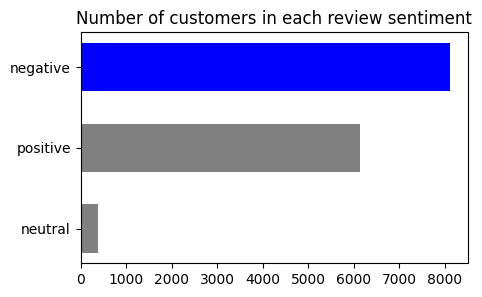

In [56]:
import matplotlib.pyplot as plt

#plotting the results
plt.figure(figsize= (5, 3))
plt.title('Number of customers in each review sentiment')
plt.barh(y = ["neutral", "positive", "negative"], width = [neut, pos, neg], height = 0.6, color = ["gray", "gray", "blue"])
plt.show()

## Conclusion:
As we can see most of the customers are not satisfied with the services provided by US Airlines. This is worrying and immediate steps should be taken. One major step to take is to find the reasons for this high number of negative reviews, then implement solutions for the top reasons.